### Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación

### Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 2021
Búsqueda y Recomendación para Textos Legales

Mentor: Jorge E. Pérez Villella

# Práctico Análisis y Visualización

Integrantes:

### Objetivos:

* Generar un corpus con todos los documentos. 

* Dividir el corpus en tokens, graficar el histograma de frecuencia de palabras demostrando la ley Zipf. 

* Analizar palabras más frecuentes y menos frecuentes. Seleccionar 5 documentos de cada fuero y realizar el mismo análisis. ¿Se repiten las palabras? 

* Hacer lo mismo con n-gramas.

* Visualizar la frecuencia de palabras en una nube de palabras.

* Elaborar una breve conclusión de lo encontrado

Fecha de Entrega: 6 de junio de 2021

# Generar un corpus con todos los documentos

In [1]:
#!conda install -y -c anaconda spacy 

In [2]:
#!python -m spacy download es_core_news_sm

In [3]:
#!python -m spacy download es_core_news_md

In [32]:
#!conda install -y -c conda-forge wordcloud

In [70]:
#!conda install -y -c conda-forge textacy

In [72]:
#!conda install -y  -c anaconda nltk 

In [73]:
import spacy
from spacy.lang.es.examples import sentences
import glob
import os
import pandas as pd 
import shutil
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import textacy

import nltk
from nltk.util import ngrams

In [74]:
#spacy_nlp = spacy.load("es_core_news_sm")
spacy_nlp = spacy.load("es_core_news_md") 

spacy_nlp.vocab["\n"].is_stop = True
spacy_nlp.vocab[" \n"].is_stop = True
spacy_nlp.vocab["y"].is_stop = True
spacy_nlp.vocab["a"].is_stop = True
spacy_nlp.vocab["o"].is_stop = True
spacy_nlp.vocab[" "].is_stop = True
spacy_nlp.vocab["  "].is_stop = True
spacy_nlp.vocab["\x0c"].is_stop = True



In [7]:
root_path = "Documentos"

directories = [x[0] for x in os.walk(root_path)]

directories.pop(0)

for directory in directories:
    print (directory)


Documentos/MENORES
Documentos/PENAL
Documentos/FAMILIA
Documentos/LABORAL


In [8]:
def path_iterator(paths):
    for p in paths:
        print("yielding")
        yield p.open("r").read(25)

In [9]:
def load_corpus(directories):
    
    for directory in directories:
        print(directory)
        file_list = glob.glob(os.path.join(os.getcwd(), directory, "*.txt"))
        #file_list = glob.glob(os.path.join(os.getcwd(), directory, "*.no"))

        for file_path in file_list:
            #print(f"Archivo: {file_path}")
        
            with open(file_path, 'r') as reader:
                line = reader.readline()
                while line != '':
                    line = reader.readline()
                    yield line.lower()
        #with open(file_path ,buffering=100 , encoding='utf-8' , errors='replace') as f_input:
        #        yield f_input

# Dividir el corpus en tokens, graficar el histograma de frecuencia de palabras demostrando la ley Zipf. 

In [54]:
def get_words(directory): 
    
    docs = spacy_nlp.pipe(load_corpus([directory]), batch_size=50 , n_process=4  ,disable=["tok2vec", "tagger",  "attribute_ruler", "lemmatizer"]  )
    docs_ret = spacy_nlp.pipe(load_corpus([directory]), batch_size=50 , n_process=4  ,disable=["tok2vec", "tagger",  "attribute_ruler", "lemmatizer"]  )
   
    words = [word.text for token in docs for word in token if not word.is_stop and not word.is_punct]
    return (words,docs_ret)

In [55]:
(words_menores,docs_menores) = get_words(directories[0])

Documentos/MENORES


In [56]:
(words_penal,docs_penal) = get_words(directories[1])

Documentos/PENAL


In [57]:
(words_familia,docs_familia) = get_words(directories[2])

Documentos/FAMILIA


In [58]:
(words_laboral,docs_laboral) = get_words(directories[3])

Documentos/LABORAL


In [59]:
def get_words_ocrruence(words):
    
    word_freq = Counter(words)
    return pd.DataFrame(word_freq.most_common() , columns= ["word" , "count"])

In [16]:
default_limit_commond_words = 20

In [17]:
df_common_words_menores = get_words_ocrruence(words_menores)

In [47]:
#df_common_words_menores[0:default_limit_commond_words]

In [19]:
df_common_words_penal = get_words_ocrruence(words_penal)

In [20]:
#df_common_words_penal[0:default_limit_commond_words]

In [21]:
df_common_words_familia = get_words_ocrruence(words_familia)

In [22]:
#df_common_words_familia[0:default_limit_commond_words]

In [23]:
df_common_words_laboral = get_words_ocrruence(words_laboral)

In [24]:
#df_common_words_laboral[0:default_limit_commond_words]

Text(0.5, 1.0, 'Laboral')

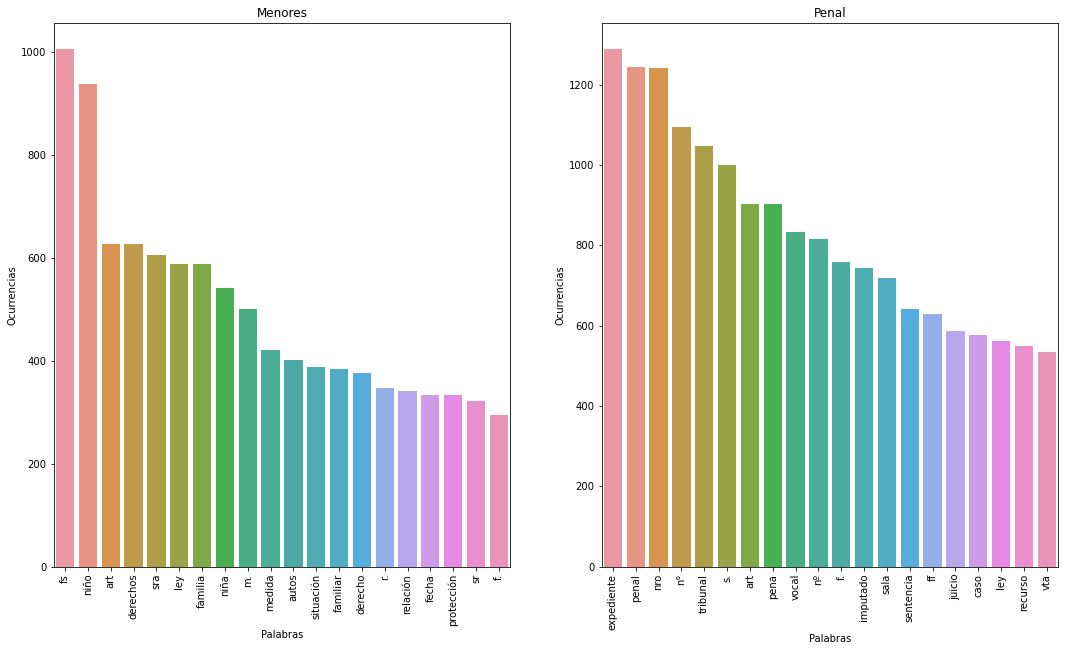

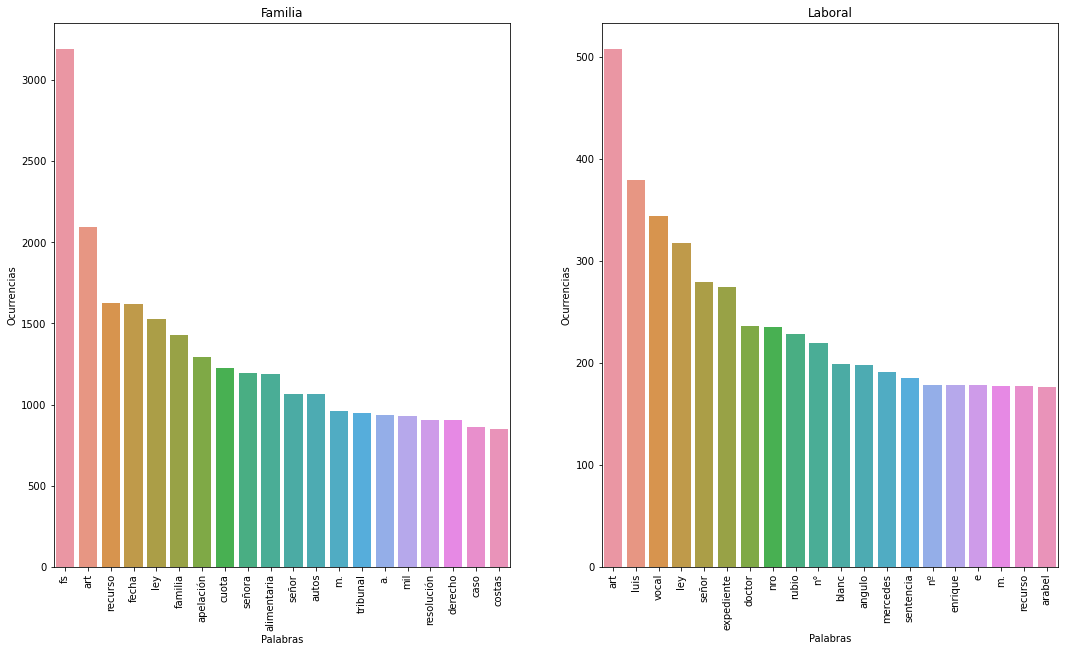

In [26]:
limit_to_plot=20

fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

seaborn.barplot(ax = axes[0] , x="word", y="count", data=df_common_words_menores.sort_values('count' ,ascending=False)[0:limit_to_plot])
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
axes[0].set_xlabel('Palabras')
axes[0].set_ylabel('Ocurrencias')
axes[0].set_title('Menores')

seaborn.barplot(ax = axes[1] , x="word", y="count", data=df_common_words_penal.sort_values('count' ,ascending=False)[0:limit_to_plot])
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)
axes[1].set_xlabel('Palabras')
axes[1].set_ylabel('Ocurrencias')
axes[1].set_title('Penal')


fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

seaborn.barplot(ax = axes[0] , x="word", y="count", data=df_common_words_familia.sort_values('count' ,ascending=False)[0:limit_to_plot])
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
axes[0].set_xlabel('Palabras')
axes[0].set_ylabel('Ocurrencias')
axes[0].set_title('Familia')

seaborn.barplot(ax = axes[1] , x="word", y="count", data=df_common_words_laboral.sort_values('count' ,ascending=False)[0:limit_to_plot])
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)
axes[1].set_xlabel('Palabras')
axes[1].set_ylabel('Ocurrencias')
axes[1].set_title('Laboral')

# Analizar palabras más frecuentes y menos frecuentes. Seleccionar 5 documentos de cada fuero y realizar el mismo análisis. ¿Se repiten las palabras?

In [27]:
def generate_corpus_df(directories):
    corpus = []

    for directory in directories:
      
        file_list = glob.glob(os.path.join(os.getcwd(), directory, "*.txt"))


        for file_path in file_list:
            with open(file_path) as f_input:
                corpus.append([f_input.read() , directory])

    #return dd.from_pandas(data = pd.DataFrame(corpus, columns=["text", "classifier"] ), npartitions=4 )
    return pd.DataFrame(corpus, columns=["text", "classifier"] )

In [30]:
df_corpus = generate_corpus_df(directories)

# Hacer lo mismo con n-gramas.

In [79]:
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]

In [95]:
data = df_corpus[1:2].text.values
data = data[0]

# El texto lo podemos transformar a nlp() y luego sobre eso recorrer y armar la nueva horacion sacando los tokens que son de puntiacion y demas

words = [word.text for token in docs for word in token if not word.is_stop and not word.is_punct]
    
#print("2-gram: ", extract_ngrams(data, 2))


In [116]:
doc_tmp = next(docs_penal)
doc_tmp

In [118]:
df_corpus.shape

(243, 2)

In [119]:
df_corpus[1:2].text.values

array(['Unívoco:18900  Fecha: 04/04/2016\n Materia Niñez \nRevista: Familia & Niñez  Número 147\n Tribunal: Juzgado de Niñez, Adolescencia y Violencia Familiar de 4ta. Nom. Sec. 12 - CORDOBA\n Resolución.  Carátula : V. A. M. Control de legalidad.\n Titulo \nMEDIDA EXCEPCIONAL. Solicitud de Cese. Rechazo. PLAZOS. Art. 607 CCCN y 5to párrafo art. 48 Ley 9944. INAPLICABILIDAD. Principio favor minoris. Interés Superior. CAPACIDAD. Derecho a ser oído. FALTA DE CONSENTIMIENTO DEL ADOLESCENTE A SER ADOPTADO.*\n Descripción \n\nEl Caso: La jueza a cargo del control de legalidad de la medida de tercer nivel rechazó el cese de la medida excepcional y declaró la inaplicabilidad de los plazos previstos por el inc. “c” del art. 607 del CCCN y 5to párrafo del art. 48 de la ley 9944. En sus fundamentos la iudex señaló, que si bien el ente administrativo agotó todas las instancias previas y necesarias para lograr el retorno del adolescente a su familia biológica, su falta de consentimiento a ser adop

# Visualizar la frecuencia de palabras en una nube de palabras.

Text(0.5, 1.0, 'Laboral')

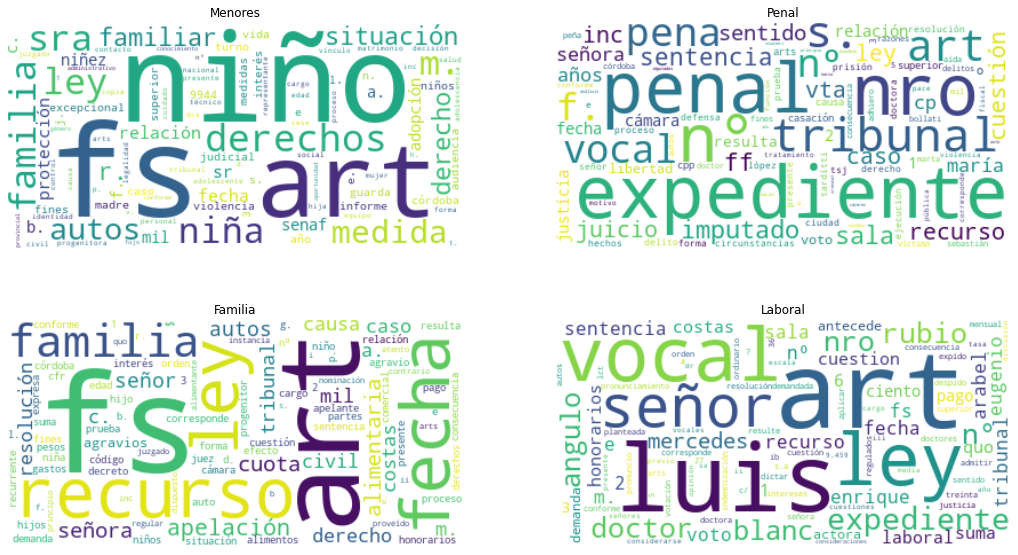

In [29]:
# https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

fig, axes = plt.subplots(2, 2 , figsize=(18, 10))


tuples = [tuple(x) for x in df_common_words_menores.values]
wordcloud = WordCloud(background_color="white" , max_words=100).generate_from_frequencies(dict(tuples))

axes[0][0].imshow(wordcloud, interpolation='bilinear')
axes[0][0].axis('off')
axes[0][0].set_title('Menores')

tuples = [tuple(x) for x in df_common_words_penal.values]
wordcloud = WordCloud(background_color="white" , max_words=100).generate_from_frequencies(dict(tuples))

axes[0][1].imshow(wordcloud, interpolation='bilinear')
axes[0][1].axis('off')
axes[0][1].set_title('Penal')

tuples = [tuple(x) for x in df_common_words_familia.values]
wordcloud = WordCloud(background_color="white" , max_words=100).generate_from_frequencies(dict(tuples))

axes[1][0].imshow(wordcloud, interpolation='bilinear')
axes[1][0].axis('off')
axes[1][0].set_title('Familia')

tuples = [tuple(x) for x in df_common_words_laboral.values]
wordcloud = WordCloud(background_color="white" , max_words=100).generate_from_frequencies(dict(tuples))

axes[1][1].imshow(wordcloud, interpolation='bilinear')
axes[1][1].axis('off')
axes[1][1].set_title('Laboral')